In [1]:
#Handling imbalanced dataset in machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('/Users/hare/PycharmProjects/Customer-Churn-Prediction-ANN/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df.TotalCharges.dtypes

dtype('O')

In [7]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/j4/z83mddb57kqdvvnnzfqzb50m0000gn/T/ipykernel_54831/62923673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


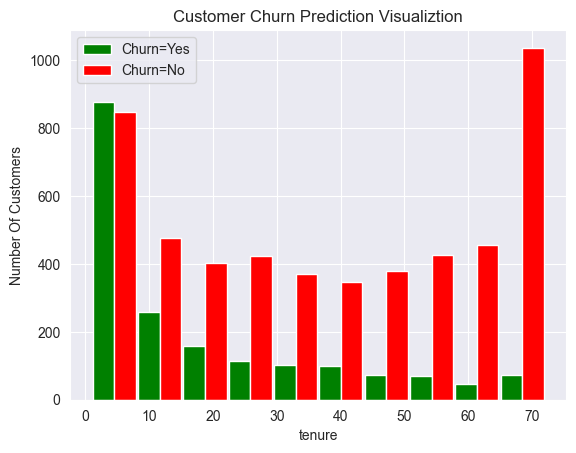

In [9]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

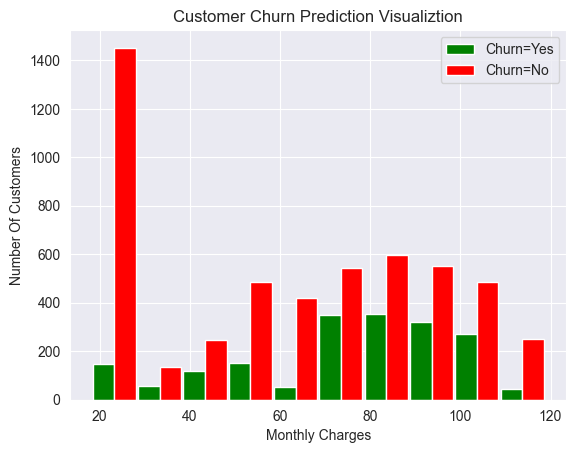

In [10]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [12]:
print_unique_col_values(
    df1
)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/var/folders/j4/z83mddb57kqdvvnnzfqzb50m0000gn/T/ipykernel_54831/2589434152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/j4/z83mddb57kqdvvnnzfqzb50m0000gn/T/ipykernel_54831/2589434152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [14]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/var/folders/j4/z83mddb57kqdvvnnzfqzb50m0000gn/T/ipykernel_54831/2871735503.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
/var/folders/j4/z83mddb57kqdvvnnzfqzb50m0000gn/T/ipykernel_54831/2871735503.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [15]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [16]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/var/folders/j4/z83mddb57kqdvvnnzfqzb50m0000gn/T/ipykernel_54831/290785505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/var/folders/j4/z83mddb57kqdvvnnzfqzb50m0000gn/T/ipykernel_54831/290785505.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [17]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [18]:
df1['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7032, dtype: object

In [19]:
df1['InternetService'].replace({'DSL':1,'Fiber optic':0},inplace=True)

/var/folders/j4/z83mddb57kqdvvnnzfqzb50m0000gn/T/ipykernel_54831/1092408428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InternetService'].replace({'DSL':1,'Fiber optic':0},inplace=True)


In [20]:
df1.gender.unique()

array([1, 0])

In [21]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_1', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                             bool
InternetService_1                             bool
InternetService_No             

In [23]:

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [24]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [25]:
df2.columns.__bool__

<bound method Index.__nonzero__ of Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_1', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')>

In [26]:
bool_cols = df2.select_dtypes(include='bool').columns
df2_bool = df2[bool_cols]
df2_bool.columns

Index(['InternetService_0', 'InternetService_1', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
df2[df2.select_dtypes('bool').columns] = df2.select_dtypes('bool').astype(int)


In [28]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int64
InternetService_1                            int64
InternetService_No             

In [29]:
for cols in df2:
    print(f'{cols}: {df2[cols].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [30]:
X=df2.drop("Churn",axis=1)
y=df2["Churn"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.7531 - loss: 0.5033
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7913 - loss: 0.4311
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.7961 - loss: 0.4236
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8005 - loss: 0.4178
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8016 - loss: 0.4154
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8094 - loss: 0.4112
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8089 - loss: 0.4108
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8089 - loss: 0.4080
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8140 - loss: 0.4059
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.8108 - loss: 0.4056
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8089 - loss: 0.4031
Epoch 12/100
176/176 ━━━━━━━━━━

In [32]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.7690 - loss: 0.5020


[0.5019541382789612, 0.7690120935440063]

In [33]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step


array([[0.00592446],
       [0.17047818],
       [0.7234318 ],
       [0.07172339],
       [0.02700121]], dtype=float32)

In [34]:

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

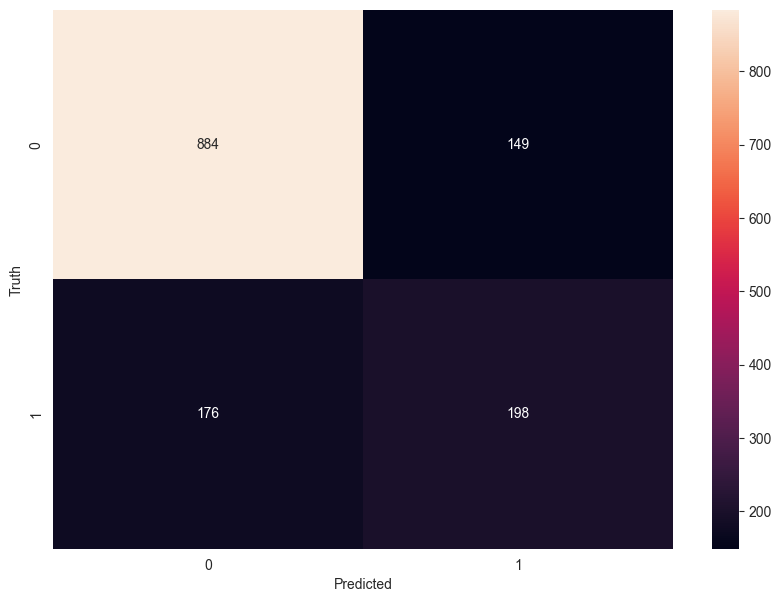

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
y_test.value_counts()

Churn
0    1033
1     374
Name: count, dtype: int64

In [38]:
#here we get to know that in the class0 of churn ---> there is 1033 in y_test
#hence there is data imbalance now we will be handling this datasets
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [39]:

# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [46]:
x = df_test_under.drop('Churn',axis=1)
y = df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15,stratify=y)


In [47]:
# Number of classes in training Data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [49]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7104 - loss: 0.5885 
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7538 - loss: 0.5068
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.7579 - loss: 0.4950
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.7579 - loss: 0.4908
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.7635 - loss: 0.4860
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.7686 - loss: 0.4833
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.7662 - loss: 0.4811
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.7676 - loss: 0.4788
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.7702 - loss: 0.4777
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.7686 - loss: 0.4777
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.7753 - loss: 0.4738
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/ste

In [50]:
#Method 2----> OVERSAMPLING
#oversampling minority class by duplication
count_class_0,count_class_1
#here class_1 is in minority hence we need to make it oversampling it

(5163, 1869)

In [56]:
#the code to oversample a class or just making duplications of the sample is through
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
#through the above code we made samples with random duplications

In [58]:
df_class_0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_1,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
6,0,0,0,1,0.295775,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
7,1,0,0,0,0.126761,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1,0,0,0,1.000000,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [59]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [60]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [61]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [62]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.7180 - loss: 0.5487
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.7634 - loss: 0.4889
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.7663 - loss: 0.4821
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7703 - loss: 0.4771
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.7703 - loss: 0.4738
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.7747 - loss: 0.4706
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.7769 - loss: 0.4670
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.7783 - loss: 0.4637
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.7800 - loss: 0.4619
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.7822 - loss: 0.4593
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.7833 - loss: 0.4573
Epoch 12/100
259/259 ━━━━━━━━━━

In [63]:
# Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score


In [64]:
# Method3: SMOTE
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [70]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.7465 - loss: 0.5210
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7769 - loss: 0.4670
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7794 - loss: 0.4577
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7812 - loss: 0.4516
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.7903 - loss: 0.4463
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.7912 - loss: 0.4418
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7923 - loss: 0.4379
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.8000 - loss: 0.4342
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8016 - loss: 0.4318
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.8022 - loss: 0.4274
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.8052 - loss: 0.4244
Epoch 12/100
259/259 ━━━━━━━━━━